# 텐서플로우 코드 구조
> **항상 이 절차를 염두하고 코딩하세요**

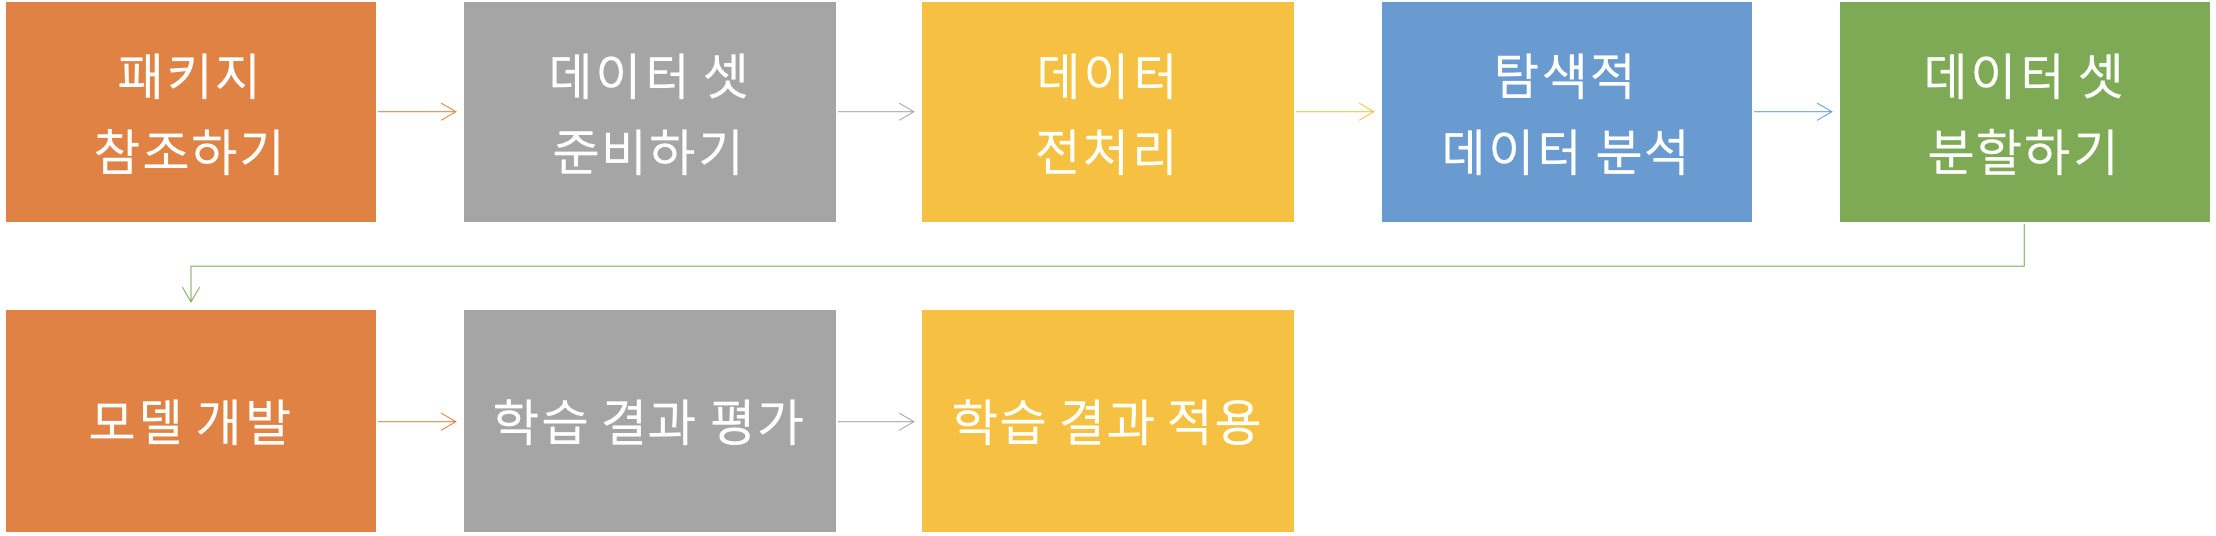

In [1]:
from IPython.display import display, Image
display(Image('image17_code.png'))

## 1. 패키지 준비하기
- 구현에 필요한 패키지들을 import 한다
- 사전에 pip (mac은 pip3) 명령어를 통해 설치가 되어 있어야 한다
- 패키지를 import하는 코드는 구현 중간에 명시해도 상관 없지만 코드 최상단에서 미리 준비해 두는 것이 전반적인 코드 가독성을 좋게 한다

## 2. 데이터셋 준비하기
- 준비한 데이터셋을 로드한다
- 데이터는 텐서 형태로 구성된다
- 엑셀, CSV, OpenAPI나 크롤링을 통해 수집한 결과, 데이터베이스에서 가져온 형태 등 데이터 셋을 준비하는데 정해진 방법은 없다

## 3. 데이터 전처리
- 결측치와 이상치 등을 확인하고 변환할 데이터(데이터타입, 데이터값 등)가 있다면 처리한다
- 범주형 데이터가 문자열로 되어있다면 숫자로 변환해준다

## 4. 탐색적 데이터 분석
- 데이터의 구조와 분포를 확인하기 위한 절차를 진행한다 (.describe(), 기초통계량, boxplot 등)
- 이 단계에서 각종 `시각화 결과물을 생성`하고 머신러닝에게 수행시킬 `학습의 방향을 결정`하게 된다
- 어떤 변수를 사용할지, 변수의 범위를 어떻게 할지 등을 선정하는 과정

## 5. 데이터셋 분할하기
- 완전한 형태의 데이터셋이고 수행해야 하는 학습 유형이 `지도학습`이라면 `독립변수와 종속변수를 분리`한다
- `sklearn.model_selection 패키지`의 `train_test_split() 함수`를 사용하여 준비된 데이터를 훈련용 데이터와 검증용 데이터로 분할한다.
> train_x, test_x, train_y, test_y = train_test_split(x_data, y_data, test_size = 테스트용데이터의_비율(실수), random_state=랜덤시드)

- 일반적으로 `7:3 `비율로 나눈다
- train_x: 훈련(학습)용 `독립변수`
- train_y: 훈련(학습)용 데이터에 대한 `종속변수`
- test_x: 검증용 `독립변수`
- test_y: 검증용 데이터에 대한 `종속변수`
- 분할된 변수 중 연속형 자료(등간척도, 비율척도)에 대해서 필요하다면 정규화나 표준화를 수행한다.
    - 척도: 자로 재는 길이의 표준
    - 등간척도: 관찰대상의 속성을 `상대적인 크기`로 나타내는 것, `순위를 부여`할 뿐 아니라 어느정도 큰지 숫자간의 의미가 있다
    - 비율척도: 절대적 기준이 있는 `영점`이 존재하고 모든 사칙연산이 가능한 것, 명목, 서열, 등간 척도의 성격을 다 가지고 있음

## 6. 모델 개발 ⭐⭐⭐⭐⭐

#### 1) `tensorflow.keras.models` 패키지의 `Sequential()` 클래스에 대한 `model` 객체를 생성한다

```python
model = Sequential()
```

#### 2) 이 객체(`model`)에 `add()` 메서드를 통해 `신경망층(=Dense층)`을 쌓는다

```python
tf.keras.layers.Dense(units,
                      input_shape = (batch_size, input_dim)
                      activation = None,
                      use_bias=True,
                      kernel_initializer='glorot_uniform',
                      bias_initializer='zeros',
                      kernel_regularizer=None,
                      bias_regularizer=None,
                      activity_regularizer=None,
                      kernel_constraint=None,
                      bias_constraint=None,
                      **kwargs))
```

        - units: 출력 뉴런의 수 (양의 정수)
            - 이 값을 어디에서부터 시작했을 떄 훈련 정확도가 가장 높은지 찾는 것이 일이다
            - 몇 부터 시작했을 때 최적의 결과가 나오느냐
            - 1, 2, 4, 8, 16, 32, 64, 128 등
            - 가능하면 가장 작은 값에서 최종 정확도가 100%이 빨리 나오는 것을 찾는 것이 이상적이다
            - 최솟값에서 시작해서 2배씩 늘려가며 최종 정확도가 가장 높게 나오는 unit값을 찾아야 된다
            - 고달프고 시간이 오래 걸리는 작업
        - input_shape: 입력 뉴련의 수 (독립변수의 개수)
            - 첫번째 층에만 들어간다 --> 두번째부터는 안 넣음
        - activation: 활성화 함수
            - linear : 디폴트 값; 입력값과 가중치로 계산된 결과 값이 그대로 출력으로 나옵니다
            - sigmoid : 시그모이드 함수로 이진분류(단순로지스틱)에서 출력층에 주로 쓰입니다
            - softmax : 소프트맥스 함수로 다중클래스 분류문제에서 출력층에 주로 쓰입니다.
            - relu: Rectified Linear Unit 함수로 은닉층에서 주로 쓰입니다.

- 층을 쌓을 때 `활성화 함수`를 `지정`해야 한다
    - `잘 알려진 분석 모델 유형에 대해서는 이미 유형별로 정해져 있다` -> 단순 암기(1_Tensorflow소개 참조)
    - 예) 회귀 분석은 선형 함수, 이진분류는 시그모이드/하이퍼볼릭탄젠트 함수, 다항분류는 소프트맥스, 잘 모르겠으면 리루!
    - `선형 회귀`인 경우 `첫번째` 활성화함수는 무조건 `relu`
- 학습 성능을 향상시키고 과적합을 방지하기 위해 `드롭아웃(Dropout)을 적용`할 수 있다 (추후 다룸)
- `층을 다 쌓은 후`에는 `model` 객체의 `.summary()` 함수를 사용하여 `요약 정보를 확인`할 수 있다
#### 3) `model` 객체의 `compile() 함수`를 사용하여 구성한 `모델을 적용`한다
```python
my_model.compile(optimizer = RMSprop(), loss=mse, metrics=['acc'])
```

- `model` 객체의 `compile() 함수`를 사용할 때 적절한 `옵티마이저`, `손실함수`, `평가지표`를 `지정`해야 한다
- `잘 알려진 분석 모델 유형에 대해서는 이미 유형별로 정해져 있다` -> 단순 암기 (1_Tensorflow소개 참조)
- 평가지표: 이 학습이 잘 됐는지에 대한 판단기준을 어떤 지표로 삼느냐
#### 4) `model` 객체의 `fit() 함수`를 사용하여 `학습을 진행`한다

```python
hist = model.fit(훈련용_독립변수, 
                 훈련용_종속변수, 
                 epochs=15, 
                 validation_data=(검증용_독립변수, 검증용_종속변수), 
                 callbacks=[])

hist.history.keys() # 학습하는 과정을 출력해준다 (있어보임)
```
- `훈련용_독립변수`와 `훈련용_종속변수` 로 학습을 시킨다
- `에폭(epochs)`은 `수행할 총 훈련주기`이다. (보통 500 정도 할 것이다 = 많이 할수록 더 똑똑해진다)
    - 예) 5만건의 데이터를 학습한다고 했을 때 이 데이터셋의 모든 케이스를 1회 `확인`하면 1에폭이다.
    - 예) 15에폭은 5만건의 데이터를 15회 `검토했다`는 것을 의미한다
- validation_data=(`검증용_독립변수`, `검증용_종속변수`) 
    - `검증용_독립변수`와 `검증용_종속변수`로 검증을 한다
- callbacks=[]
    - 학습 성능을 향상시키기 위한 `콜백 함수`들을 `지정`할 수 있다
    - 콜백 함수들은 (7_단순선형회귀(학습성능개선).ipynb) 파일 참조
- 데이터가 크고, 모델이 복잡한 경우 매우 오래 걸린다
- 학습 결과로 반환받은 객체의 history 정보를 확인하면 학습 결과를 검토할 수 있는 항목을 확인할 수 있다

- 예)
```python
my_model = Sequential()

# 첫번째 Dense층
my_model.add(Dense(16, input_shape = (2,), activation = 'relu'))
    # 16 --> 16개를 출력
    # input_shape = (2, ) --> 2개의 입력값을 받음
    # activation = 'relu' --> 선형회귀인 경우 첫번째 활성화 함수는 무조건 relu로 잡는다
        # 이 층의 결과값은 0 아니면 1 즉, 이진분류값

# 중간 Dense층
    # 다 안 쌓아도 중간 층들은 알아서 쌓아준다
    # 여기서는 8, 4, 2의 출력을 가지는 층들이 은닉되어 있다고 말한다 (-> '은닉층')
    # unit 외에 다른 파라미터들은 앞의 층과 동일하게 구성되어 있을 것 (input_shape, activation 등)

# 마지막 Dense층
my_model.add(Dense(1, activation = 'sigmoid'))
    # 1 --> 1개를 출력
    # activation = 'sigmoid' --> 전 층의 결과값이 [0,1] 즉, 이진분류값이기에 활성화함수는 sigmoid 사용 
        # 다항분류일 경우 (예) 입력값이 [0, 1, 2, 3]일 경우) softmax를 사용하면 됨
    # 마지막 층에 어떤 활성화 함수를 사용하느냐에 따라 분석 알고리즘 종류가 결정된다 -> 이 모델에서는 sigmoid로 결정됨
my_model.compile(optimizer = RMSprop(), loss=mse, metrics=['acc'])
my_model.summary()
```

## 7. 학습 결과 평가하기
- `hist.history` 객체에 포함된 학습과정에 대한 데이터를 `시각화`하여 `학습 과정을 확인`할 수 있다
    - 예) 과적합이 발생했는지 안 했는지 등
- 출력되는 값: loss, mae, val_loss, val_mae
    - loss = 훈련 데이터 손실률
    - mae = 훈련 절대오차
    - val_loss = 검증 데이터 손실률
    - val_mae = 검증 절대오차
- `model` 객체의 `evaluate() 함수`를 사용하여 `성능을 확인`할 수 있다
- `model` 객체의 `predict() 함수`에 `검증용 데이터셋`을 `학습된 모델에 적용`하여 종속변수에 대한 `예측치를 산정`한다
- `실제 종속변수값과 비교`하여 `정확도를 확인`한다


## 8. 학습 결과 적용하기
- 완성된 모델에 `임의의 데이터를 적용`하여 머신러닝에 의한 `예측 결과를 만들어낼 수 있다`